In [25]:
import pandas as pd

# URLs directas de los archivos en GitHub
url_2004 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/Individual_t104.dta"
url_2024 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/usu_individual_T124.xlsx"

# Leer los archivos directamente desde GitHub
data_2004 = pd.read_stata(url_2004)
data_2024 = pd.read_excel(url_2024)

print(data_2004.head())
print(data_2024.head())


     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

In [46]:
# Códigos de aglomerados para CABA y GBA
aglomerados_caba_gba = [32, 33]
aglomerados_nombres = ["Ciudad de Buenos Aires", "Partidos del GBA"]


# Filtrar las observaciones de CABA y GBA
data_2004_filtered = data_2004[data_2004['aglomerado'].isin(aglomerados_nombres)]
data_2024_filtered = data_2024[data_2024['AGLOMERADO'].isin(aglomerados_caba_gba)]

# Unir las bases de datos
data_combined = pd.concat([data_2004_filtered, data_2024_filtered], ignore_index=True)





In [41]:


# Filtrar observaciones con ingresos y edades no válidas
data_combined_clean = data_combined[
    (data_combined['IPCF'] >= 0) &  # Ingresos no negativos
    (data_combined['CH06'] >= 0) &  # Edades no negativas
    (data_combined['CH06'] <= 120)  # Edades razonables
]

# Verificar dimensiones antes y después de la limpieza
print(f"Dimensiones antes de la limpieza: {data_combined.shape}")
print(f"Dimensiones después de la limpieza: {data_combined_clean.shape}")



Dimensiones antes de la limpieza: (16377, 352)
Dimensiones después de la limpieza: (7000, 352)


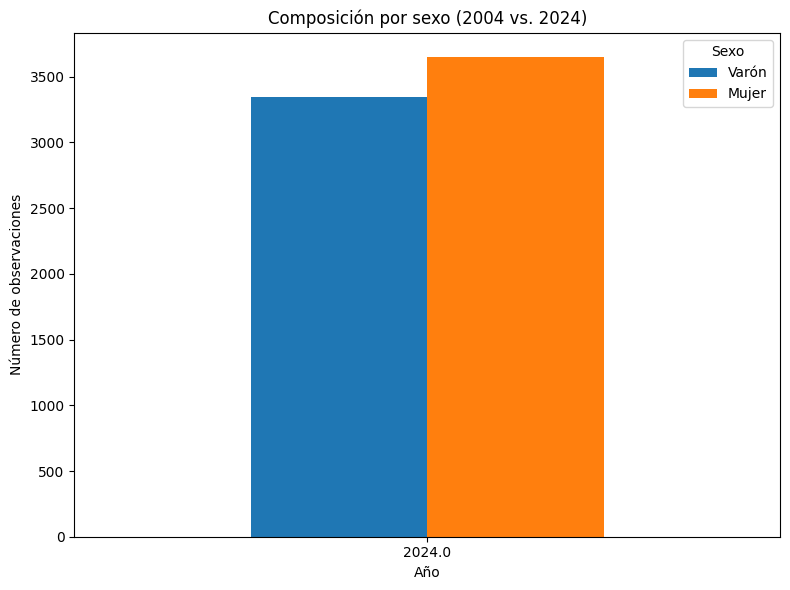

In [42]:
#gráfico por año y sexo

import matplotlib.pyplot as plt

# Agrupar por año y sexo
sexo_composicion = data_combined_clean.groupby(['ANO4', 'CH04']).size().unstack()

# Renombrar los valores de CH04 (1: Varón, 2: Mujer)
sexo_composicion.columns = ['Varón', 'Mujer']

# Gráfico de barras
sexo_composicion.plot(kind='bar', figsize=(8, 6))
plt.title("Composición por sexo (2004 vs. 2024)")
plt.ylabel("Número de observaciones")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


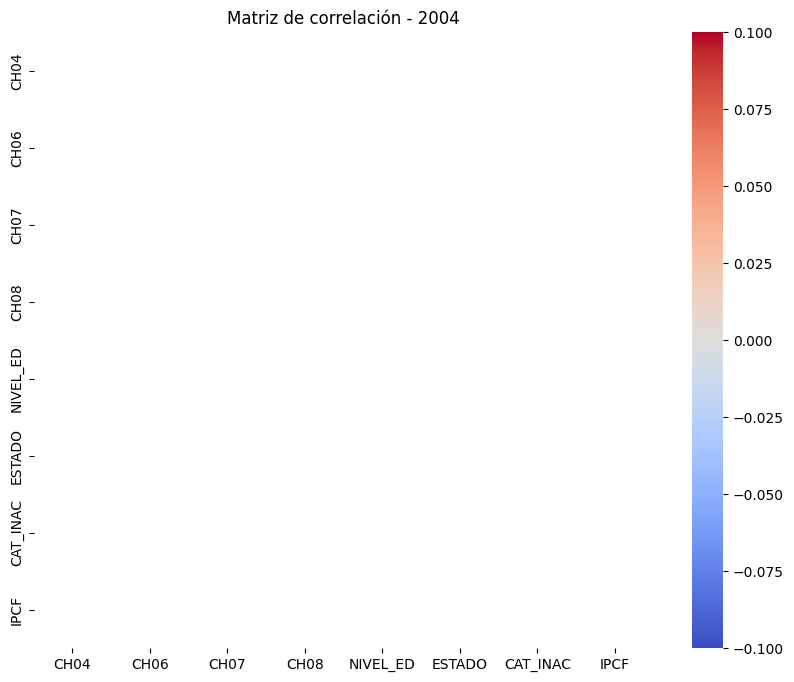

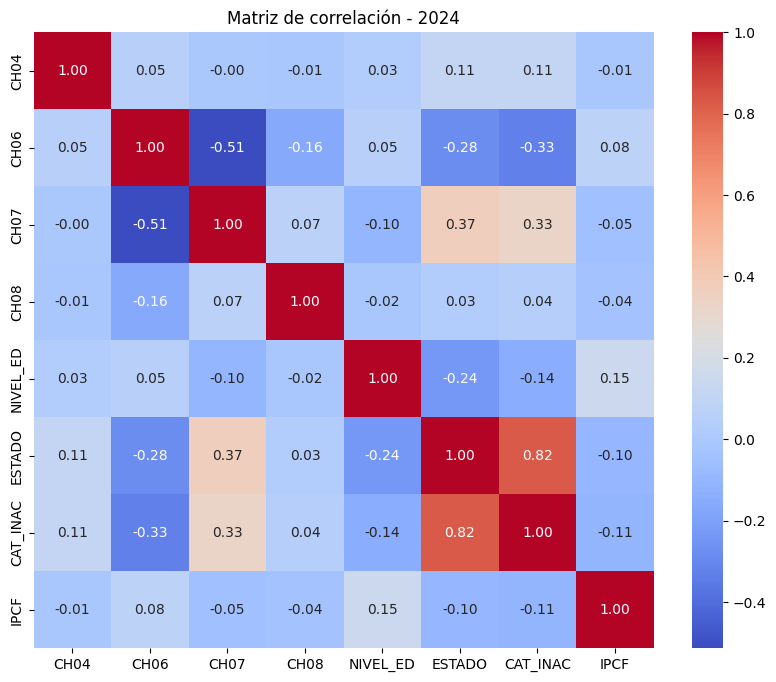

In [43]:
#Matriz de correlación


import seaborn as sns

# Filtrar las variables seleccionadas para 2004 y 2024
vars_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
data_2004_corr = data_combined_clean[data_combined_clean['ANO4'] == 2004][vars_corr]
data_2024_corr = data_combined_clean[data_combined_clean['ANO4'] == 2024][vars_corr]

# Matrices de correlación
corr_2004 = data_2004_corr.corr()
corr_2024 = data_2024_corr.corr()

# Gráficos de las matrices
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación - 2004")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación - 2024")
plt.show()


In [45]:
# Conteos por condición de actividad
ocupados = data_combined_clean[data_combined_clean['ESTADO'] == 1].shape[0]
desocupados = data_combined_clean[data_combined_clean['ESTADO'] == 2].shape[0]
inactivos = data_combined_clean[data_combined_clean['ESTADO'] == 3].shape[0]

print(f"Desocupados: {desocupados}")
print(f"Inactivos: {inactivos}")

# Media de IPCF por estado
ipcf_mean_by_state = data_combined_clean.groupby('ESTADO')['IPCF'].mean()
print("Media de IPCF por estado:")
print(ipcf_mean_by_state)


Desocupados: 311
Inactivos: 2662
Media de IPCF por estado:
ESTADO
0.0         0.000000
1.0    207644.844045
2.0     85019.145466
3.0    130704.601499
4.0    104745.950079
Name: IPCF, dtype: float64
